In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/ppg/CMU_resample.csv')
data.head()

,CustomerID,invoice_count,total_products,avg_purchase_frequency,avg_spend_ttm,label
0,15185,1,666,0.000000,31.062,0
1,17131,5,983,0.526316,246.317,0
2,16475,4,319,6.851852,54.430,0
3,13854,29,2278,3.159292,802.502,0
4,14741,6,841,6.224138,140.034,0


In [3]:
data.count()

CustomerID                1700
invoice_count             1700
total_products            1700
avg_purchase_frequency    1700
avg_spend_ttm             1700
label                     1700
dtype: int64

In [4]:
for column in data.columns:
    print("Descriptive Analysis of {}".format(column))
    print()
    print(data[column].describe())
    print()

Descriptive Analysis of CustomerID

count     1700.000000
mean     15209.904118
std       1721.452951
min      12360.000000
25%      13721.500000
50%      15198.500000
75%      16670.500000
max      18283.000000
Name: CustomerID, dtype: float64

Descriptive Analysis of invoice_count

count    1700.000000
mean        8.650000
std        13.778384
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max       248.000000
Name: invoice_count, dtype: float64

Descriptive Analysis of total_products

count      1700.000000
mean       2076.924118
std        7250.586357
min           0.000000
25%         342.750000
50%         819.000000
75%        1759.250000
max      196719.000000
Name: total_products, dtype: float64

Descriptive Analysis of avg_purchase_frequency

count    1700.000000
mean        3.315540
std         7.604333
min         0.000000
25%         0.767970
50%         1.676554
75%         3.257123
max       127.500000
Name: avg_purchase_frequency, dt

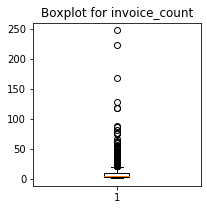

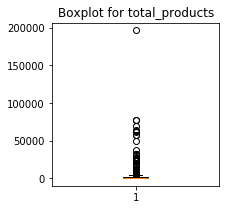

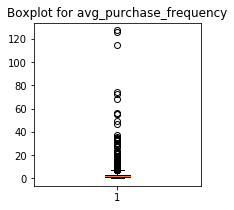

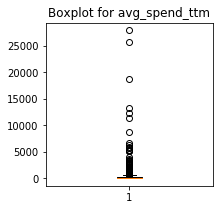

In [5]:
for index, column in enumerate(data.columns):
    if index == 0 or index == 5:
        continue
    fig, ax = plt.subplots(figsize=(3,3))
    ax = plt.boxplot(data[column])
    plt.title('Boxplot for {}'.format(column))
    fig.savefig('plots/box_{}.png'.format(column))

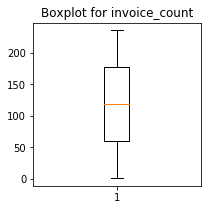

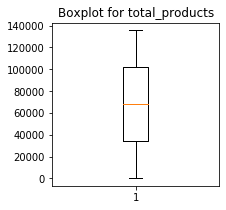

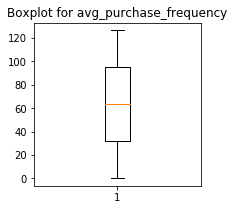

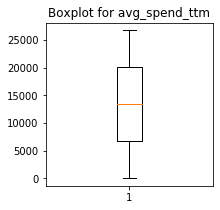

In [6]:
for index, column in enumerate(data.columns):
    if index == 0 or index == 5:
        continue
    fig, ax = plt.subplots(figsize=(3,3))
    ax = plt.boxplot(data[column].quantile([0, 0.9997]))
    plt.title('Boxplot for {}'.format(column))
    fig.savefig('plots/box_{}.png'.format(column))

## Explore Labels

In [7]:
print("The number of churning customers is {}".format(data[data['label'] == 1].label.count()))
print("The number of not churning customers is {}".format(data[data['label'] == 0].label.count()))

The number of churning customers is 100
The number of not churning customers is 1600


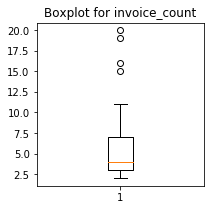

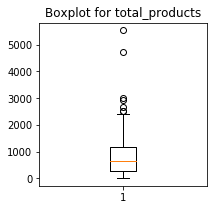

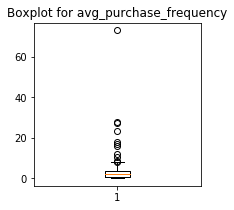

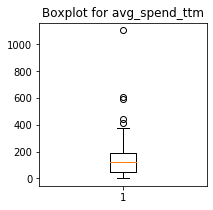

In [8]:
# are those outliers the churner?

churn_data = data[data['label'] == 1]

for index, column in enumerate(churn_data.columns):
    if index == 0 or index == 5:
        continue
    fig, ax = plt.subplots(figsize=(3,3))
    ax = plt.boxplot(churn_data[column])
    plt.title('Boxplot for {}'.format(column))
    fig.savefig('plots/box_churn_{}.png'.format(column))

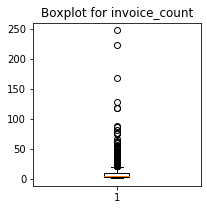

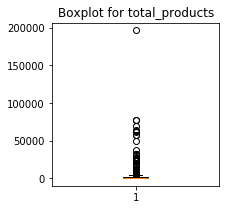

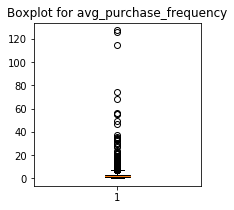

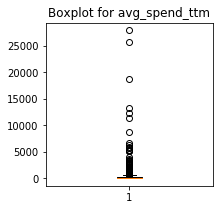

In [9]:
not_churn_data = data[data['label'] == 0]

for index, column in enumerate(not_churn_data.columns):
    if index == 0 or index == 5:
        continue
    fig, ax = plt.subplots(figsize=(3,3))
    ax = plt.boxplot(not_churn_data[column])
    plt.title('Boxplot for {}'.format(column))
    fig.savefig('plots/box_not_churn_{}.png'.format(column))

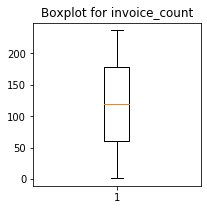

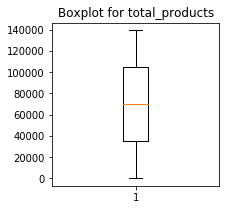

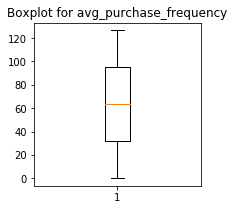

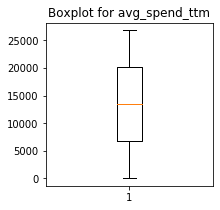

In [10]:
for index, column in enumerate(not_churn_data.columns):
    if index == 0 or index == 5:
        continue
    fig, ax = plt.subplots(figsize=(3,3))
    ax = plt.boxplot(not_churn_data[column].quantile([0, 0.9997]))
    plt.title('Boxplot for {}'.format(column))
    fig.savefig('plots/box_not_churn_without_outliers_{}.png'.format(column))

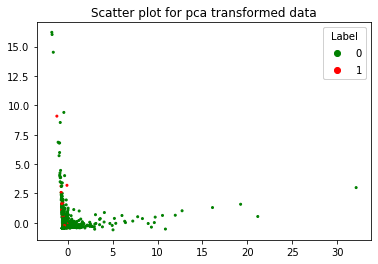

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import colors

data_array = data.iloc[:, 1:5].to_numpy()
scaler = StandardScaler()
standard_data = scaler.fit_transform(data_array)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data)

cmap = colors.ListedColormap(['green', 'red'])
fig, ax = plt.subplots()
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], s=4, c=data.iloc[:, 5], cmap=cmap)
plt.title('Scatter plot for pca transformed data')
legend1 = plt.legend(*scatter.legend_elements(), title="Label")
ax.add_artist(legend1)
fig.savefig('plots/pca.png')

## t-SNE

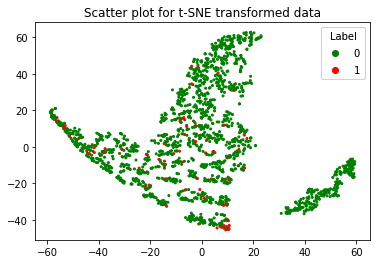

In [5]:
from sklearn.manifold import TSNE

tsne_data = TSNE(n_components=2).fit_transform(standard_data)

cmap = colors.ListedColormap(['green', 'red'])
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_data[:, 0], tsne_data[:, 1], c=data.iloc[:, 5], s=4, cmap=cmap)
plt.title('Scatter plot for t-SNE transformed data')
legend1 = plt.legend(*scatter.legend_elements(), title="Label")
ax.add_artist(legend1)
fig.savefig('plots/tsne.png')

## Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=3, kernel='rbf')
X_transformed = transformer.fit_transform(X)

cmap = colors.ListedColormap(['green', 'red'])
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_data[:, 0], tsne_data[:, 1], c=data.iloc[:, 5], cmap=cmap)
plt.title('Scatter plot for t-SNE transformed data')
legend1 = plt.legend(*scatter.legend_elements(), title="Label")
ax.add_artist(legend1)
fig.savefig('plots/tsne.png')